# Teen Market Segmentation Using K-means Clustering

Interacting with friends on a social networking service (SNS) has become a rite of passage for teenagers around the world. The many millions of teenage consumers using such sites have attracted the attention of marketers struggling to find an edge in an increasingly competitive market. One way to gain this edge is to identify segments of teenagers who share similar tastes, so that clients can avoid targeting advertisements to teens with no interest in the product being sold. For instance, sporting apparel is likely to be a difficult sell to teens with no interest in sports.

## Dataset Information

The dataset represents a random sample of 30,000 U.S. high school students who had profiles on a well-known SNS in 2006. To protect the users’ anonymity, the SNS will remain unnamed. The data was sampled evenly across four high school graduation years (2006 through 2009) representing the senior, junior, sophomore, and freshman classes at the time of data collection
The dataset contatins 40 variables like: gender, age, friends, basketball, football, soccer, softball, volleyball,swimming, cute, sexy, kissed, sports, rock, god, church, bible, hair, mall, clothes, hollister, drugs etc whcih shows their interests. The final dataset indicates, for each person, how many times each word appeared in the person’s SNS profile

## Load Libraries

In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

# Load Data

In [2]:
pd.set_option('display.max_columns',None)
data = pd.read_csv(r"C:\Users\Archit\Desktop\Training\Imarticus\PGAA\PGAACombined\Clustering\snsdata.csv")
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [3]:
data.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

## Summary Statistics

### Summary Statistics of Numerical Variables

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gradyear,4566.0,2006.000000,0.000000,2006.000,2006.000,2006.000,2006.00000,2006.000
age,3840.0,19.149429,6.388005,5.194,18.379,18.678,18.98775,106.927
friends,4566.0,26.120456,32.065369,0.000,2.000,16.000,38.00000,373.000
basketball,4566.0,0.211345,0.759756,0.000,0.000,0.000,0.00000,22.000
football,4566.0,0.228866,0.686250,0.000,0.000,0.000,0.00000,10.000
soccer,4566.0,0.150898,0.699715,0.000,0.000,0.000,0.00000,14.000
softball,4566.0,0.105125,0.596364,0.000,0.000,0.000,0.00000,12.000
volleyball,4566.0,0.091108,0.493573,0.000,0.000,0.000,0.00000,11.000
swimming,4566.0,0.101183,0.399686,0.000,0.000,0.000,0.00000,7.000
cheerleading,4566.0,0.073587,0.440371,0.000,0.000,0.000,0.00000,9.000


### Summary Statistics of Categorical Variables

In [10]:
data.describe(include='object')

,gender
count,4131
unique,2
top,F
freq,3171


## Treating Missing Values

In [7]:
data.isnull().sum()

gradyear          0
gender          435
age             726
friends           0
basketball        0
football          0
soccer            0
softball          0
volleyball        0
swimming          0
cheerleading      0
baseball          0
tennis            0
sports            0
cute              0
sex               0
sexy              0
hot               0
kissed            0
dance             0
band              0
marching          0
music             0
rock              0
god               0
church            0
jesus             0
bible             0
hair              0
dress             0
blonde            0
mall              0
shopping          0
clothes           0
hollister         0
abercrombie       0
die               0
death             0
drunk             0
drugs             0
dtype: int64

A total of 5,086 records have missing ages. Also concerning is the fact that the minimum and maximum values seem to be unreasonable; it is unlikely that a 3 year old or a 106 year old is attending high school.

Let's have a look at the number of male and female candidates in our dataset

In [8]:
data['gender'].value_counts()

F    3171
M     960
Name: gender, dtype: int64

 Let's have a look at the number of male, female and msiing values 

In [9]:
data['gender'].value_counts(dropna = False)

F      3171
M       960
NaN     435
Name: gender, dtype: int64

In [11]:
3171+435

3606

There are 22054 female, 5222 male teen students and 2724 missing values

Now we are going to fill all the null values in gender column with “No Gender”

In [12]:
data['gender'].fillna('not disclosed', inplace = True)

In [13]:
data['gender'].isnull().sum()

0

Also, the age cloumn has 5086 missing values. One way to deal with these missing values would be to fill the missing values with the average age of each graduation year

In [69]:
data.groupby('gradyear')['age'].mean()

gradyear
2006    19.149429
Name: age, dtype: float64

From the above summary we can observe that the mean age differs by roughly one year per change in graduation year. This is not at all surprising, but a helpful finding for confirming our data is reasonable

We now fill the missing values for each graduation year with the mean that we got as above

We don't have any missing values in the 'age' column

In [15]:
data.age.mean()

19.149428645833265

In [16]:
data["age"].fillna(data.age.mean(), inplace=True)

In [17]:
data.isnull().sum()

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

From the above summary we can see that there are no missing values in the dataset

## Treating Outliers

The original age range contains value from 3 - 106, which is unrealistic because student at age of 3 or 106 would not attend high school. A reasonable age range for people attending high school will be the age range between 13 to 21. The rest should be treated as outliers keeping the age of student going to high school in mind. Let's detect the outliers using a box plot below

In [18]:
summy=data.describe(percentiles=[0.01,0.05, 0.1, 0.15,0.25,.5, .75, .9,.95,.99]).T

In [20]:
summy.to_csv(r"C:\Users\Archit\Desktop\Training\Imarticus\PGAA\PGAACombined\Clustering\basic_sts.csv")

In [72]:
data.columns.to_list()

['gradyear',
 'gender',
 'age',
 'friends',
 'basketball',
 'football',
 'soccer',
 'softball',
 'volleyball',
 'swimming',
 'cheerleading',
 'baseball',
 'tennis',
 'sports',
 'cute',
 'sex',
 'sexy',
 'hot',
 'kissed',
 'dance',
 'band',
 'marching',
 'music',
 'rock',
 'god',
 'church',
 'jesus',
 'bible',
 'hair',
 'dress',
 'blonde',
 'mall',
 'shopping',
 'clothes',
 'hollister',
 'abercrombie',
 'die',
 'death',
 'drunk',
 'drugs']

In [21]:
num_var=['age',
 'friends',
 'basketball',
 'football',
 'soccer',
 'softball',
 'volleyball',
 'swimming',
 'cheerleading',
 'baseball',
 'tennis',
 'sports',
 'cute',
 'sex',
 'sexy',
 'hot',
 'kissed',
 'dance',
 'band',
 'marching',
 'music',
 'rock',
 'god',
 'church',
 'jesus',
 'bible',
 'hair',
 'dress',
 'blonde',
 'mall',
 'shopping',
 'clothes',
 'hollister',
 'abercrombie',
 'die',
 'death',
 'drunk',
 'drugs']

In [22]:
for col in data[num_var]:
    percentiles = data[col].quantile([0.01,0.99]).values
    data[col][data[col] <= percentiles[0]] = percentiles[0]
    data[col][data[col] >= percentiles[1]] = percentiles[1]

<ipython-input-22-385a33d40a05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] <= percentiles[0]] = percentiles[0]
<ipython-input-22-385a33d40a05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] >= percentiles[1]] = percentiles[1]
<ipython-input-22-385a33d40a05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] <= percentiles[0]] = percentiles[0]
<ipython-input-22-385a33d40a

In [26]:
data.describe(percentiles=[0.01,0.05, 0.1,.95,.99]).T

,count,mean,std,min,1%,5%,10%,50%,95%,99%,max
gradyear,4566.0,2006.000000,0.000000,2006.0000,2006.000000,2006.000,2006.000,2006.000,2006.00000,2006.000000,2006.00000
age,4566.0,18.761127,0.476683,16.9243,16.924755,18.073,18.229,18.795,19.37225,20.143308,20.14945
friends,4566.0,25.699956,29.684330,0.0000,0.000000,0.000,0.000,16.000,87.00000,145.000000,145.00000
basketball,4566.0,0.189663,0.550167,0.0000,0.000000,0.000,0.000,0.000,1.00000,3.000000,3.00000
football,4566.0,0.213754,0.583710,0.0000,0.000000,0.000,0.000,0.000,1.00000,3.000000,3.00000
soccer,4566.0,0.125931,0.497659,0.0000,0.000000,0.000,0.000,0.000,1.00000,3.000000,3.00000
softball,4566.0,0.087385,0.411801,0.0000,0.000000,0.000,0.000,0.000,1.00000,3.000000,3.00000
volleyball,4566.0,0.072492,0.321894,0.0000,0.000000,0.000,0.000,0.000,1.00000,2.000000,2.00000
swimming,4566.0,0.093955,0.335779,0.0000,0.000000,0.000,0.000,0.000,1.00000,2.000000,2.00000
cheerleading,4566.0,0.058038,0.291395,0.0000,0.000000,0.000,0.000,0.000,0.00000,2.000000,2.00000


C:\Users\Archit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

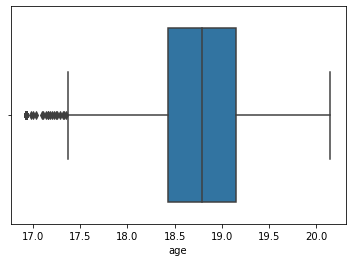

In [23]:
sns.boxplot(data['age'])

From the above summary we can observe that after treating the outliers the mininmum age is 13.719000 and the maximum age is 21.158000

From the above boxplot we observe that there are no outliers in the age column

## Data Preprocessing

A common practice employed prior to any analysis using distance calculations is to normalize or z-score standardize the features so that each utilizes the same range. By doing so, you can avoid a problem in which some features come to dominate solely because they have a larger range of values than the others.
<br>The process of z-score standardization rescales features so that they have a mean of zero and a standard deviation of one. This transformation changes the interpretation of the data in a way that may be useful here. Specifically, if someone mentions Swimming three times on their profile, without additional information, we have no idea whether this implies they like Swimming more or less than their peers. On the other hand, if the z-score is three, we know that that they mentioned Swimming many more times than the average teenager.

In [28]:
names = data.columns[5:40]
scaled_feature = data.copy()
names

Index(['football', 'soccer', 'softball', 'volleyball', 'swimming',
       'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy',
       'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god',
       'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall',
       'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death',
       'drunk', 'drugs'],
      dtype='object')

In [30]:
features = scaled_feature[names]

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features.values)

In [32]:
features = scaler.transform(features.values)

In [33]:
scaled_feature[names] = features
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,-0.366239,-0.253074,-0.212225,-0.22523,-0.279843,-0.199193,-0.233007,-0.200782,-0.297854,-0.398184,-0.290700,-0.29183,-0.248888,-0.216011,0.846556,-0.318571,-0.181746,-0.673926,-0.391264,-0.441713,-0.31675,-0.26003,-0.137728,-0.375030,-0.283186,-0.207799,-0.332837,-0.488867,-0.306758,-0.178506,-0.162167,-0.333067,-0.292376,-0.265916,-0.194841
1,2006,F,18.801,0,0,1.347128,-0.253074,-0.212225,-0.22523,-0.279843,-0.199193,-0.233007,-0.200782,-0.297854,1.036788,-0.290700,-0.29183,-0.248888,-0.216011,-0.402757,-0.318571,-0.181746,1.284170,4.047277,0.578966,-0.31675,-0.26003,-0.137728,5.616530,6.181953,-0.207799,1.640842,-0.488867,-0.306758,-0.178506,-0.162167,-0.333067,-0.292376,-0.265916,-0.194841
2,2006,M,18.335,69,0,1.347128,-0.253074,-0.212225,-0.22523,-0.279843,-0.199193,-0.233007,-0.200782,-0.297854,-0.398184,-0.290700,-0.29183,-0.248888,-0.216011,-0.402757,2.200205,-0.181746,0.305122,-0.391264,-0.441713,-0.31675,-0.26003,-0.137728,-0.375030,-0.283186,-0.207799,-0.332837,-0.488867,-0.306758,-0.178506,-0.162167,-0.333067,2.437663,-0.265916,-0.194841
3,2006,F,18.875,0,0,-0.366239,-0.253074,-0.212225,-0.22523,-0.279843,-0.199193,-0.233007,-0.200782,-0.297854,1.036788,-0.290700,-0.29183,-0.248888,-0.216011,-0.402757,-0.318571,-0.181746,-0.673926,1.828006,-0.441713,-0.31675,-0.26003,-0.137728,-0.375030,-0.283186,-0.207799,-0.332837,-0.488867,-0.306758,-0.178506,-0.162167,-0.333067,-0.292376,-0.265916,-0.194841
4,2006,not disclosed,18.995,10,0,-0.366239,-0.253074,-0.212225,-0.22523,-0.279843,-0.199193,-0.233007,-0.200782,-0.297854,-0.398184,1.411012,-0.29183,-0.248888,6.251584,0.846556,0.940817,-0.181746,2.263217,-0.391264,0.578966,-0.31675,-0.26003,-0.137728,0.823282,-0.283186,-0.207799,-0.332837,2.750854,-0.306758,-0.178506,-0.162167,-0.333067,-0.292376,2.590956,5.132379


## Convert object variable to numeric 

In [34]:
def gender_to_numeric(x):
    if x=='M':
        return 1
    if x=='F':
        return 2
    if x=='not disclosed':
        return 3

In [35]:
scaled_feature['gender'] = scaled_feature['gender'].apply(gender_to_numeric)
scaled_feature['gender'].head()

0    1
1    2
2    1
3    2
4    3
Name: gender, dtype: int64

In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=22)

In [42]:
model = kmeans.fit(scaled_feature)

In [46]:
model.labels_

array([0, 0, 1, ..., 1, 1, 0])

In [47]:
data["Cluster_3_sol"]=model.labels_

In [48]:
data["Cluster_3_sol"].value_counts()

0    2773
1    1403
2     390
Name: Cluster_3_sol, dtype: int64

In [55]:
mean_clus3=data.groupby(["Cluster_3_sol"]).mean(['age',
 'friends',
 'basketball',
 'football',
 'soccer',
 'softball',
 'volleyball',
 'swimming',
 'cheerleading',
 'baseball',
 'tennis',
 'sports',
 'cute',
 'sex',
 'sexy',
 'hot',
 'kissed',
 'dance',
 'band',
 'marching',
 'music',
 'rock',
 'god',
 'church',
 'jesus',
 'bible',
 'hair',
 'dress',
 'blonde',
 'mall',
 'shopping',
 'clothes',
 'hollister',
 'abercrombie',
 'die',
 'death',
 'drunk',
 'drugs']).T

In [58]:
mean_clus3.to_excel("Clust.xlsx")

In [57]:
import os 
os.chdir(r"C:\Users\Archit\Desktop\Training\Imarticus\PGAA\PGAACombined\Clustering")

In [59]:
data.shape

(4566, 41)

In [66]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gradyear,4566.0,2006.000000,0.000000,2006.0000,2006.000,2006.000,2006.000000,2006.00000
age,4566.0,18.761127,0.476683,16.9243,18.431,18.795,19.149429,20.14945
friends,4566.0,25.699956,29.684330,0.0000,2.000,16.000,38.000000,145.00000
basketball,4566.0,0.189663,0.550167,0.0000,0.000,0.000,0.000000,3.00000
football,4566.0,0.213754,0.583710,0.0000,0.000,0.000,0.000000,3.00000
soccer,4566.0,0.125931,0.497659,0.0000,0.000,0.000,0.000000,3.00000
softball,4566.0,0.087385,0.411801,0.0000,0.000,0.000,0.000000,3.00000
volleyball,4566.0,0.072492,0.321894,0.0000,0.000,0.000,0.000000,2.00000
swimming,4566.0,0.093955,0.335779,0.0000,0.000,0.000,0.000000,2.00000
cheerleading,4566.0,0.058038,0.291395,0.0000,0.000,0.000,0.000000,2.00000


In [65]:
xyz["mean"].to_csv("mean.csv")

## Elbow Method

In [69]:
model.inertia_

775865.2045478676

In [71]:
wcss=[]
for i in range(2,25):
    kmean_loop=KMeans(n_clusters=i, random_state=22)
    kmean_loop.fit(scaled_feature)
    wcss.append(kmean_loop.inertia_)

[]

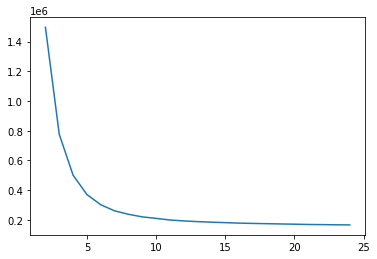

In [72]:
plt.plot(range(2,25), wcss);
plt.plot()

Cluster 1 Inertia 4186056.618683582
Cluster 2 Inertia 1495427.1818358125
Cluster 3 Inertia 775865.2045478676
Cluster 4 Inertia 501071.12718489533
Cluster 5 Inertia 370339.1162711902
Cluster 6 Inertia 302649.91796160623
Cluster 7 Inertia 261953.73311978538
Cluster 8 Inertia 238794.00966795313
Cluster 9 Inertia 220299.31868074415
Cluster 10 Inertia 210061.88770592277
Cluster 11 Inertia 199745.74496217162
Cluster 12 Inertia 193964.73549632574
Cluster 13 Inertia 189587.26734474066
Cluster 14 Inertia 185309.81616101073
Cluster 15 Inertia 181827.81338459213
Cluster 16 Inertia 180334.1910752365
Cluster 17 Inertia 177227.1798349382
Cluster 18 Inertia 175741.30026312772
Cluster 19 Inertia 173745.04164358412


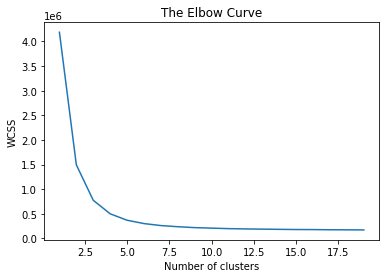

In [73]:
# Creating a funtion with KMeans to plot "The Elbow Curve"
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. Our Elbow point is around cluster size of 5. We will use k=5 to further interpret our clustering result

In [79]:
kmeans5=KMeans(n_clusters=5)

In [80]:
model5=kmeans5.fit(scaled_feature)

In [81]:
data["Cluster_5_sol"]=model5.labels_

In [82]:
data["Cluster_5_sol"].value_counts()

4    1989
0    1252
3     802
1     384
2     139
Name: Cluster_5_sol, dtype: int64

In [83]:
mean_clus5=data.groupby(["Cluster_5_sol"]).mean(['age',
 'friends',
 'basketball',
 'football',
 'soccer',
 'softball',
 'volleyball',
 'swimming',
 'cheerleading',
 'baseball',
 'tennis',
 'sports',
 'cute',
 'sex',
 'sexy',
 'hot',
 'kissed',
 'dance',
 'band',
 'marching',
 'music',
 'rock',
 'god',
 'church',
 'jesus',
 'bible',
 'hair',
 'dress',
 'blonde',
 'mall',
 'shopping',
 'clothes',
 'hollister',
 'abercrombie',
 'die',
 'death',
 'drunk',
 'drugs']).T

In [84]:
mean_clus5.to_csv("clust5.csv")

In [86]:
new=pd.read_csv("new.csv")

In [88]:
names = new.columns[5:40]
scaled_feature = new.copy()
names
features = scaled_feature[names]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_feature[names] = features
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,M,19,5,3,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2009,F,17,18,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:

def gender_to_numeric(x):
    if x=='M':
        return 1
    if x=='F':
        return 2
    if x=='not disclosed':
        return 3
scaled_feature['gender'] = scaled_feature['gender'].apply(gender_to_numeric)
scaled_feature['gender'].head()

0    1
1    2
Name: gender, dtype: int64

In [91]:

model5.predict(scaled_feature)

array([4, 0])

### Fit K-Means clustering for k=5

In [74]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_feature)

KMeans(n_clusters=3)

As a result of clustering, we have the clustering label. Let's put these labels back into the original numeric data frame.

In [75]:
len(kmeans.labels_)

4566

In [76]:
data['cluster_3'] = kmeans.labels_

In [77]:
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,Cluster_3_sol,cluster_3
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,5,3,0,1,0,0,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,0,0


## Interpreting Clustering Results

Let's see cluster sizes first

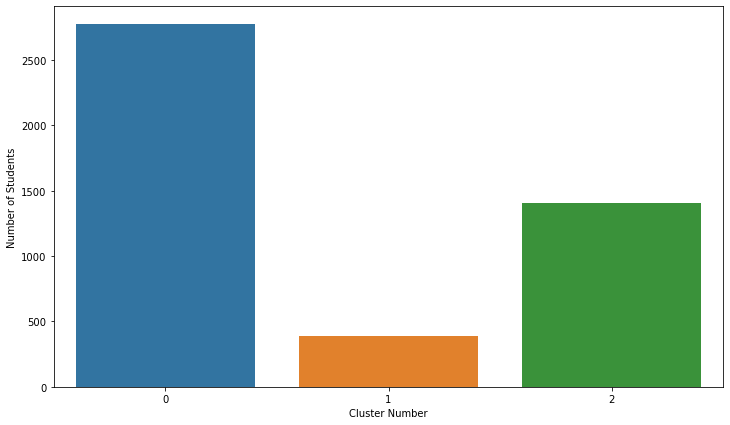

In [78]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,3,1),y=data.groupby(['cluster_3']).count()['age'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of Students")

From the above plot we can see that cluster 0 is the largest and cluster 1 has fewest teen students

Let' see the number of students belonging to each cluster

In [53]:
size_array = list(data.groupby(['cluster_3']).count()['age'].values)
size_array

[2282, 1228, 330]

let's check the cluster statistics

In [54]:
data.groupby(["cluster_3"]).mean()[["age", "basketball"]]

,age,basketball
cluster_3,,
0,18.674932,0.170213
1,18.686199,0.218104
2,18.631701,0.225641


In [58]:
data.groupby(["cluster_3"]).agg({"basketball":["mean", "count","sum"], "football":["sum"]})

basketball            football
                mean count  sum      sum
cluster_3                               
0           0.170213  2773  472      545
1           0.218104  1403  306      325
2           0.225641   390   88      106

In [60]:
data.groupby(['cluster_3']).mean()[['basketball', 'football','soccer', 'softball','volleyball','swimming','cheerleading','baseball','tennis','sports','cute','sex','sexy','hot','kissed','dance','band','marching','music','rock','god','church','jesus','bible','hair','dress','blonde','mall','shopping','clothes','hollister','abercrombie','die', 'death','drunk','drugs']]

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster_3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.170213,0.196538,0.108186,0.076812,0.062748,0.081861,0.050487,0.068878,0.057339,0.096286,0.257843,0.179589,0.102056,0.077894,0.062387,0.296790,0.228994,0.026686,0.645510,0.167688,0.392715,0.185359,0.072845,0.016228,0.316264,0.115398,0.039308,0.153264,0.271547,0.105301,0.027407,0.020916,0.132708,0.103859,0.095925,0.038586
1,0.218104,0.231646,0.155381,0.106201,0.087669,0.114754,0.062010,0.079116,0.054170,0.127584,0.297933,0.163222,0.096935,0.080542,0.074840,0.354954,0.270848,0.033500,0.776194,0.193870,0.461155,0.241625,0.116180,0.024234,0.304348,0.153956,0.046329,0.181041,0.337135,0.126158,0.031361,0.027798,0.146828,0.106914,0.091946,0.038489
2,0.225641,0.271795,0.146154,0.094872,0.087179,0.105128,0.097436,0.089744,0.066667,0.094872,0.343590,0.135897,0.120513,0.105128,0.069231,0.387179,0.358974,0.064103,0.676923,0.174359,0.615385,0.258974,0.141026,0.015385,0.320513,0.164103,0.038462,0.233333,0.389744,0.120513,0.053846,0.051282,0.128205,0.130769,0.076923,0.015385


The cluster center values shows each of the cluster centroids of the coordinates. The row referes to the five clusters,the numbers across each row indicates the cluster’s average value for the interest listed at the top of the column. Positive values are above the overall mean level.